[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/combine-org/combine-notebooks/binder_colab_testing?labpath=%2Fnotebooks%2Fsedml.ipynb)
<a href="https://colab.research.google.com/github/combine-org/combine-notebooks/blob/main/notebooks/sedml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab\"/></a>

# Simple SED-ML example

This notebook creates a simple model in [SED-ML Level 1 Version 4](https://sed-ml.org/specifications.html).

## 1) Including libraries and helper functions

In [45]:
import tempfile
from pathlib import Path

import libsedml
import tellurium as te

from combine_notebooks import RESULTS_DIR

In [46]:
def pretty_print(doc_before : libsedml.SedDocument, doc_after : libsedml.SedDocument = None):
    # Break the original SBML into lines
    original_document = libsedml.writeSedMLToString(doc_before)
    original_document_lines = original_document.split('\n')
    # Print the entire document in red
    if doc_after == None:
        original_document = '\n'.join(original_document_lines)
        print("\x1b[31m" + original_document + "\x1b[0m") # ANSI escape used to print colours here
    # If a new document is also given, highlight the lines that have changed
    else:
        # Split the updated SBML into lines
        new_document = libsedml.writeSedMLToString(doc_after)
        new_document_lines = new_document.split('\n')
        # Iterate over each new line
        for new_line in new_document_lines:
            # Print any new lines in red, otherwise print normally
            if new_line in original_document_lines:
                print(new_line)
            else:
                print("\x1b[31m" + new_line + "\x1b[0m") # ANSI escape used to print colours here

## 2) Declaring the SED-ML model

First we create a SED-ML document at Level 1 Version 4.

In [47]:
doc = libsedml.SedDocument(1, 4)

pretty_print(doc)

<?xml version="1.0" encoding="UTF-8"?>
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" level="1" version="4"/>



Create a first model referencing an sbml file.

In [48]:
start_doc = libsedml.SedDocument(doc)

model = doc.createModel()
model.setId("model1")
model.setSource("sbml.xml")
model.setLanguage("urn:sedml:language:sbml.level-3.version-1") 

pretty_print(start_doc, doc)

<?xml version="1.0" encoding="UTF-8"?>
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" level="1" version="4">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-1" source="sbml.xml"/>
  </listOfModels>
</sedML>



Create a simulation and set the important parameters (e.g. inital time, number of steps).  We also specify that we want to use the CVODE algorithm, which is a method for integrating ordinary differential equations.

In [49]:
start_doc = libsedml.SedDocument(doc)

# create simulation
tc = doc.createUniformTimeCourse()
tc.setId("sim1")
tc.setInitialTime(0.0)
tc.setOutputStartTime(0.0)
tc.setOutputEndTime(5.0)
tc.setNumberOfSteps(100)
# need to set the correct KISAO Term
alg = tc.createAlgorithm()
alg.setName("CVODE")
alg.setKisaoID("KISAO:0000019")

pretty_print(start_doc, doc)

<?xml version="1.0" encoding="UTF-8"?>
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" level="1" version="4">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-1" source="sbml.xml"/>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="5" numberOfSteps="100">
      <algorithm name="CVODE" kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
</sedML>



Create a task that uses the simulation and the model above.

In [50]:
start_doc = libsedml.SedDocument(doc)

task = doc.createTask()
task.setId("task1")
task.setModelReference("model1")
task.setSimulationReference("sim1")

pretty_print(start_doc, doc)

<?xml version="1.0" encoding="UTF-8"?>
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" level="1" version="4">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-1" source="sbml.xml"/>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="5" numberOfSteps="100">
      <algorithm name="CVODE" kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="task1" modelReference="model1" simulationReference="sim1"/>
  </listOfTasks>
</sedML>



Add three DataGenerator to hold the outputs.

In [51]:
start_doc = libsedml.SedDocument(doc)

dg = doc.createDataGenerator()
dg.setId("plot_0_0_0")
dg.setName("time")
var = dg.createVariable()
var.setId("time")
var.setTaskReference("task1")
var.setModelReference("model1")
var.setSymbol("urn:sedml:symbol:time")
dg.setMath(libsedml.parseFormula("time"))

dg = doc.createDataGenerator()
dg.setId("plot_0_0_1")
dg.setName("S1")
var = dg.createVariable()
var.setId("S1")
var.setTaskReference("task1")
var.setModelReference("model1")
var.setTarget("/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id='S1']")
dg.setMath(libsedml.parseFormula("S1"))

dg = doc.createDataGenerator()
dg.setId("plot_0_1_1")
dg.setName("S2")
var = dg.createVariable()
var.setId("S2")
var.setTaskReference("task1")
var.setModelReference("model1")
var.setTarget("/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id='S2']")
dg.setMath(libsedml.parseFormula("S2"))

pretty_print(start_doc, doc)


<?xml version="1.0" encoding="UTF-8"?>
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" level="1" version="4">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-1" source="sbml.xml"/>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="5" numberOfSteps="100">
      <algorithm name="CVODE" kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="task1" modelReference="model1" simulationReference="sim1"/>
  </listOfTasks>
  <listOfDataGenerators>
    <dataGenerator id="plot_0_0_0" name="time">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> time </ci>
      </math>
      <listOfVariables>
        <variable id="time" symbol="urn:sedml:symbol:time" taskReference="task1" modelReference="model1"/>
      </listOfVariables>
    </dataGenerator>
    <dataGenerator id="plot_0_0_1" name="S1">
      <math xmlns="h

Finally, we will create a 2d plot with two curves.

In [52]:
start_doc = libsedml.SedDocument(doc)

plot = doc.createPlot2D()
plot.setId("plot_0")
plot.setName("Figure 1")
curve = plot.createCurve()
curve.setId("plot_0__plot_0_0_0__plot_0_0_1")
curve.setLogX(False)
curve.setLogY(False)
curve.setXDataReference("plot_0_0_0")
curve.setYDataReference("plot_0_0_1")

curve = plot.createCurve()
curve.setId("plot_0__plot_0_0_0__plot_0_1_1")
curve.setLogX(False)
curve.setLogY(False)
curve.setXDataReference("plot_0_0_0")
curve.setYDataReference("plot_0_1_1")

pretty_print(start_doc, doc)

<?xml version="1.0" encoding="UTF-8"?>
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" level="1" version="4">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-1" source="sbml.xml"/>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="5" numberOfSteps="100">
      <algorithm name="CVODE" kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="task1" modelReference="model1" simulationReference="sim1"/>
  </listOfTasks>
  <listOfDataGenerators>
    <dataGenerator id="plot_0_0_0" name="time">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> time </ci>
      </math>
      <listOfVariables>
        <variable id="time" symbol="urn:sedml:symbol:time" taskReference="task1" modelReference="model1"/>
      </listOfVariables>
    </dataGenerator>
    <dataGenerator id="plot_0_0_1" name="S1">
      <math xmlns="h

## 3) Print the simulation experiment model

And we're done creating the basic model.
Now save a text string containing the model into a SED-ML file.

In [53]:
RESULTS_DIR.mkdir(parents=True, exist_ok=True)
sedml_loc = RESULTS_DIR / 'hello_world_sedml.sedml'
libsedml.writeSedML(doc, str(sedml_loc))
sedml_str = open(sedml_loc).read()
print(sedml_str)

<?xml version="1.0" encoding="UTF-8"?>
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" level="1" version="4">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-1" source="sbml.xml"/>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="5" numberOfSteps="100">
      <algorithm name="CVODE" kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="task1" modelReference="model1" simulationReference="sim1"/>
  </listOfTasks>
  <listOfDataGenerators>
    <dataGenerator id="plot_0_0_0" name="time">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> time </ci>
      </math>
      <listOfVariables>
        <variable id="time" symbol="urn:sedml:symbol:time" taskReference="task1" modelReference="model1"/>
      </listOfVariables>
    </dataGenerator>
    <dataGenerator id="plot_0_0_1" name="S1">
      <math xmlns="h

## 4) Running the simulation experiment model

In [54]:
te.setDefaultPlottingEngine('matplotlib')

# Load a SBML model we want to simulate
sbml_loc = Path(RESULTS_DIR.stem) / 'hello_world_sbml.xml'
sbml_str = open(sbml_loc).read()

# Load SED-ML string created in section 2
sedml_str = open(sedml_loc).read()

# Create a temporary directory to store SED-ML and SBML files
workingDir = tempfile.mkdtemp(suffix="_sedml")

# Get paths for a temporary file, the filename here should 
# match what is in our SED-ML document
sbml_file = Path(workingDir) / 'sbml.xml'

# Save SBML to the temporary file
with open(sbml_file, 'wb') as f:
    f.write(sbml_str.encode('utf-8'))
    f.flush()
    print('SBML written to temporary file')

SBML written to temporary file


Read SED-ML file, number of errors: 0


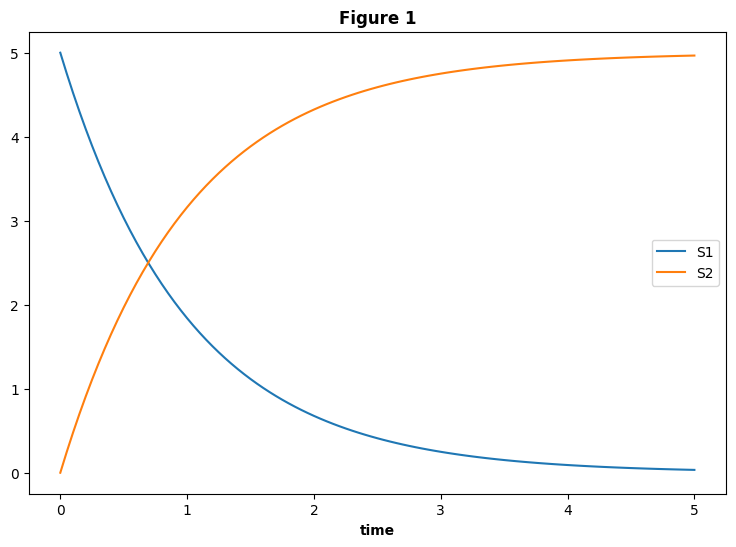

In [55]:
# Validate our SED-ML
n_errors = doc.getErrorLog().getNumFailsWithSeverity(libsedml.LIBSEDML_SEV_ERROR)
print('Read SED-ML file, number of errors: {}'.format(n_errors))
if n_errors > 0:
    print(doc.getErrorLog().toString())

# execute SED-ML using Tellurium
te.executeSEDML(sedml_str, workingDir=workingDir)